In [1]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns

import matplotlib.pyplot as plt

print(f'''=== Imported packages ===
pandas: {pd.__version__}
numpy: {np.__version__}
matplotlib: {matplotlib.__version__}
seaborn: {sns.__version__}
''')

=== Imported packages ===
pandas: 1.4.4
numpy: 1.23.3
matplotlib: 3.5.2
seaborn: 0.12.0



Dataset source: https://www.kaggle.com/datasets/crawlfeeds/nike-fashion-products-dataset

------------------------------------------

**Importing** dataset

In [2]:
df = pd.read_csv(r'data/Housing_in_London/housing_in_london_monthly_variables.csv',)
df.head()

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1
2,1995-03-01,city of london,79121,E09000001,14.0,NaN,1
3,1995-04-01,city of london,77101,E09000001,7.0,NaN,1
4,1995-05-01,city of london,84409,E09000001,10.0,NaN,1


------------------------------------------

Dataset has **13549** rows and **7** columns

In [3]:
print(df.info())
print(f'DATASET SHAPE: {df.shape}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           13549 non-null  object 
 1   area           13549 non-null  object 
 2   average_price  13549 non-null  int64  
 3   code           13549 non-null  object 
 4   houses_sold    13455 non-null  float64
 5   no_of_crimes   7439 non-null   float64
 6   borough_flag   13549 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 741.1+ KB
None
DATASET SHAPE: (13549, 7)


------------------------------------------

Columns having **NA** values: **houses_sold**, **no_of_crimes** 

In [4]:
print(df.isna().sum())
print(f'DATASET SHAPE: {df.shape}')

date                0
area                0
average_price       0
code                0
houses_sold        94
no_of_crimes     6110
borough_flag        0
dtype: int64
DATASET SHAPE: (13549, 7)


------------------------------------------

Lets try to clean the dataset
* by filling **NA** with **mean values** where possible
* by **dropping** unnessesary columns and rows
* by converting **scraped_at** to **datetime** format

In [5]:
# replacing NA with mean values
df['houses_sold'].fillna(df.houses_sold.mean(), inplace = True)
# df['review_count'].fillna(df.review_count.mean(), inplace = True)
df['date'] = pd.to_datetime(df['date'])

# dropping columns
# df.drop(['no_of_crimes'],axis=1,inplace=True)

# dropping rows with remained NA values
df.dropna(inplace = True)

print(df.isna().sum())
print(f'DATASET SHAPE: {df.shape}')

date             0
area             0
average_price    0
code             0
houses_sold      0
no_of_crimes     0
borough_flag     0
dtype: int64
DATASET SHAPE: (7439, 7)


Now dataset is **cleaned**

------------------------------------------

In [6]:
df.describe()

,average_price,houses_sold,no_of_crimes,borough_flag
count,7.439000e+03,7439.000000,7439.000000,7439.0
mean,3.500115e+05,338.621404,2158.352063,1.0
std,1.889422e+05,359.715940,902.087742,0.0
min,8.234300e+04,2.000000,0.000000,1.0
25%,2.255815e+05,208.000000,1623.000000,1.0
50%,2.974500e+05,284.000000,2132.000000,1.0
75%,4.183675e+05,394.500000,2582.000000,1.0
max,1.463378e+06,3893.994129,7461.000000,1.0


In [7]:
df.head()

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
72,2001-01-01,city of london,284262,E09000001,24.0,0.0,1
73,2001-02-01,city of london,198137,E09000001,37.0,0.0,1
74,2001-03-01,city of london,189033,E09000001,44.0,0.0,1
75,2001-04-01,city of london,205494,E09000001,38.0,0.0,1
76,2001-05-01,city of london,223459,E09000001,30.0,0.0,1


<AxesSubplot:xlabel='average_price', ylabel='no_of_crimes'>

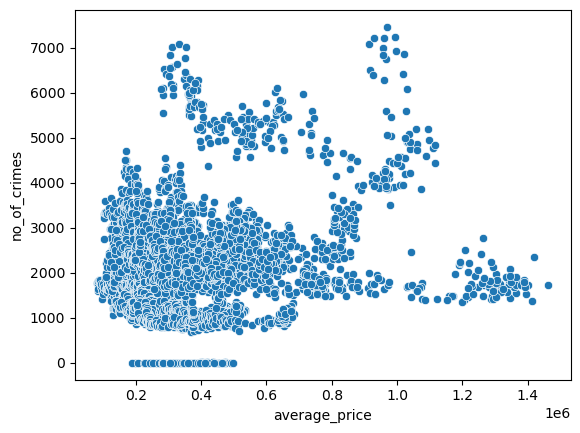

In [8]:
sns.scatterplot(data=df, x="average_price", y="no_of_crimes")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7439 entries, 72 to 9937
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           7439 non-null   datetime64[ns]
 1   area           7439 non-null   object        
 2   average_price  7439 non-null   int64         
 3   code           7439 non-null   object        
 4   houses_sold    7439 non-null   float64       
 5   no_of_crimes   7439 non-null   float64       
 6   borough_flag   7439 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 464.9+ KB


In [10]:
df.describe()

,average_price,houses_sold,no_of_crimes,borough_flag
count,7.439000e+03,7439.000000,7439.000000,7439.0
mean,3.500115e+05,338.621404,2158.352063,1.0
std,1.889422e+05,359.715940,902.087742,0.0
min,8.234300e+04,2.000000,0.000000,1.0
25%,2.255815e+05,208.000000,1623.000000,1.0
50%,2.974500e+05,284.000000,2132.000000,1.0
75%,4.183675e+05,394.500000,2582.000000,1.0
max,1.463378e+06,3893.994129,7461.000000,1.0


<AxesSubplot:xlabel='date', ylabel='average_price'>

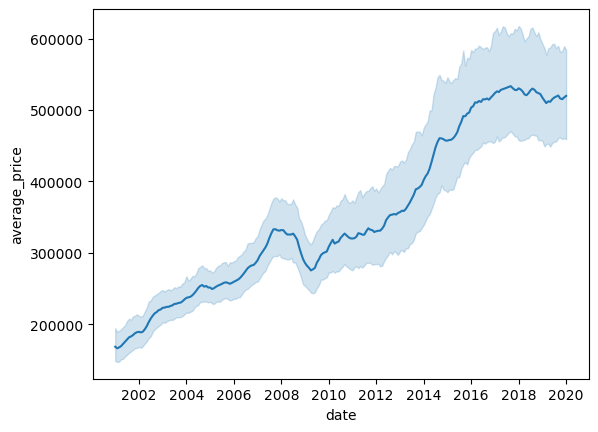

In [11]:
sns.lineplot(data=df, x="date", y="average_price")

Linear Regression

In [12]:
df.shape

(7439, 7)

In [13]:
df.columns

Index(['date', 'area', 'average_price', 'code', 'houses_sold', 'no_of_crimes',
       'borough_flag'],
      dtype='object')

In [14]:
dataset = df
dataset.drop(['date'],axis=1,inplace=True)
dataset.drop(['area'],axis=1,inplace=True)
dataset.drop(['code'],axis=1,inplace=True)
dataset.drop(['borough_flag'],axis=1,inplace=True)
dataset.drop(['houses_sold'],axis=1,inplace=True)
dataset.head()

,average_price,no_of_crimes
72,284262,0.0
73,198137,0.0
74,189033,0.0
75,205494,0.0
76,223459,0.0


In [15]:
# Importing the dataset
# dataset = df
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [16]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [17]:
# Training the Simple Linear Regression model on the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [18]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)


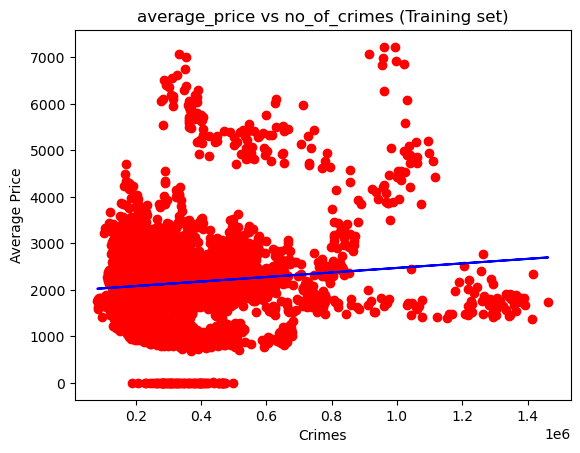

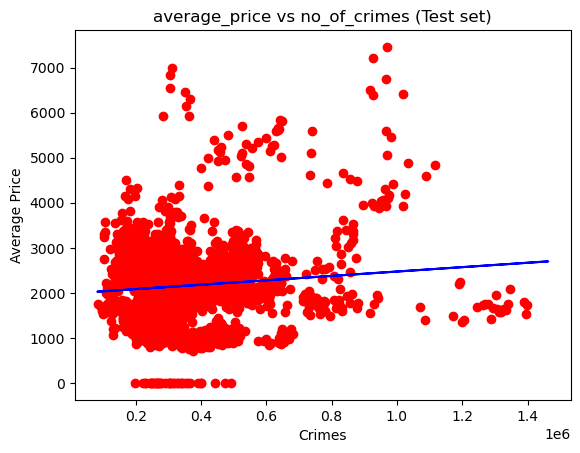

In [19]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('average_price vs no_of_crimes (Training set)')
plt.xlabel('Crimes')
plt.ylabel('Average Price')
plt.show()

# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('average_price vs no_of_crimes (Test set)')
plt.xlabel('Crimes')
plt.ylabel('Average Price')
plt.show()

In [20]:
# sample = df.sort_values(by=['average_price'], ascending=False, inplace=False)
# sample.shape

In [21]:
# top_5 = list(sample.area.unique()[:5])
# top_5

In [22]:
# print(f'Old shape: {sample.shape}')

# for row in sample.index:
#     if df.loc[row, "area"] not in top_5:
#         sample.drop(row, inplace= True)
        
# print(f'New shape: {sample.shape}')

In [23]:
# sns.lineplot(data=sample, x="date", y="average_price", hue='area')

In [24]:
# sns.lineplot(data=sample, x="date", y="no_of_crimes", hue='area')

In [25]:
# sample.shape

In [26]:
# sns.boxplot(data=sample, x='houses_sold')

In [27]:
# fig, ax = plt.subplots(figsize = (18,10))
# ax.scatter(sample['houses_sold'], sample['date'])

**SIGMA RULE** states for removing everything which is higher or lower than 3 SD from the mean

In [28]:
# # Z score
# from scipy import stats
# import numpy as np
 
# z = np.abs(stats.zscore(sample['houses_sold']))
# print(z)

In [29]:
# threshold = 3
 
# # Position of the outlier
# print(np.where(z > 3))
# outliers = list(np.where(z > 3))
# outliers

In [30]:
# 3*sample.houses_sold.std()

In [31]:
# print("Old Shape: ", sample.shape)

# for row in sample.index:
#     if sample.loc[row, "houses_sold"] >= 3*sample.houses_sold.std() or sample.loc[row, "houses_sold"] <= 3*sample.houses_sold.std():
#         df.drop(row, inplace= True)

# print("New Shape: ", sample.shape)

In [32]:
# sns.lineplot(data=sample, x="date", y="houses_sold", hue='area')

In [33]:
# for row in df.index:
#     if df.loc[row, "avg_rating"] < 4.4:
#         df.drop(row, inplace= True)